<a href="https://colab.research.google.com/github/jaanvinambiar/Python-data-science/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import  svm
from sklearn.metrics import accuracy_score

#Data Collection and Processing

In [27]:
#load csv file and print the initial values
df = pd.read_csv("/content/loan_dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
#number of null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
df=df.dropna()
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
#label encoding
df['Loan_Status']=df.Loan_Status.astype(object)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [33]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [34]:
#replace 3+ with 4
df = df.replace(to_replace='3+', value=4)
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

#Data Visualization

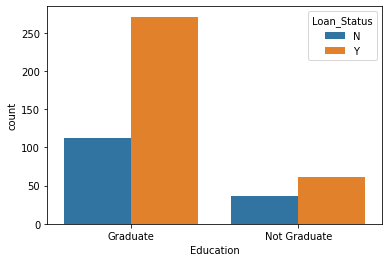

In [35]:
#education and loan status 
sns.countplot(x='Education', hue='Loan_Status', data=df);

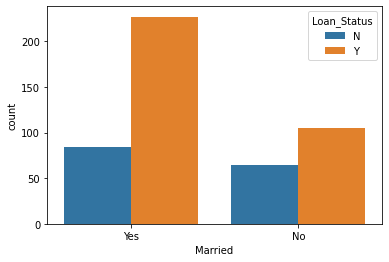

In [36]:
#martial status and loan status
sns.countplot(x='Married', hue='Loan_Status', data=df);

In [37]:
# replacing categorical values into numerical values

df['Married']=df.Married.astype(object)
df['Gender']=df.Gender.astype(object)
df['Self_Employed']=df.Self_Employed.astype(object)
df['Property_Area']=df.Property_Area.astype(object)
df['Education']=df.Education.astype(object)
df.replace({'Married':{'No':0,'Yes':1},
            'Gender':{'Male':0,'Female':1},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},
            'Education':{'Graduate':0,'Not Graduate':1}},inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,Y
5,LP001011,0,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,Y


In [38]:
#dropping ID and loan statue=s columns

X = df.drop(columns=['Loan_ID','Loan_Status'])
Y = df['Loan_Status']

#Train Test Split

In [39]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [40]:
print(X.shape,X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training The model:

Support Vector Machine Model

In [41]:
classifier = svm.SVC(kernel='linear')

In [42]:
classifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
X_train_prediction = classifier.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction,Y_train)

In [44]:
print("Accuracy on training data : ",training_accuracy)

Accuracy on training data :  0.7731481481481481


In [45]:
X_test_prediction = classifier.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Accuracy on testing data : ",testing_accuracy)

Accuracy on testing data :  0.8333333333333334


#Make a predictive system

In [46]:
input = (0,1,1,0,0,4583,1508,128,360,1,0)

#converting into numpy array
input_array = np.asarray(input)

input_reshape = input_array.reshape(1,-1)

predict = classifier.predict(input_reshape)

if(predict[0] == 'Y'):
  print('Loan is approved.')
else:
  print('Loan not approved.')

Loan is approved.
